In [2]:
"""Importing the libraries"""

import numpy as np
import pandas as pd 
from sklearn.preprocessing import minmax_scale
from sklearn.multioutput import RegressorChain
from sklearn.tree import ExtraTreeRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import seaborn as sns 




In [4]:
def mean_euclidean_error(y_true, y_pred):
    """
    mean euclidean error MEE
    """

    error = 0
    if len(y_true) == len(y_pred):
        for i in range(len(y_true)):
            error = error + np.sqrt(np.square(y_pred[i][0]
                                    - y_true[i][0])
                                    + np.square(y_pred[i][1]
                                    - y_true[i][1]))
        return error / len(y_true)

In [5]:
"""Importing the dataset"""

train_df = pd.read_csv('../data/ML-CUP20-TR .csv')
test_df = pd.read_csv('../data/ML-CUP20-TS.csv')
test_cup = pd.read_csv('../data/ML-CUP20-TS.csv')

In [6]:
"""Splitting the dataset into the Training set and Test set"""

train_x = train_df.iloc[:, :-2].to_numpy()
train_y = train_df.iloc[:, [10, 11]].to_numpy()


In [7]:
"""Splitting the dataset into the Training set and Test set"""

(x_train, x_test, y_train, y_test) = train_test_split(train_x, train_y,
        test_size=0.4, random_state=30)

In [8]:
""" Fitting ExtraTreeRegressor to the Training set with the best parameters obtained form gridsearch"""

et_regressor = Pipeline(steps=[('scale', StandardScaler()), ('estimator'
                        ,
                        RegressorChain(ExtraTreeRegressor(ccp_alpha=0.0,
                                                                  criterion='mse',
                                                                  max_depth=6,
                                                                  max_features='auto',
                                                                  max_leaf_nodes=20,
                                                                  min_impurity_decrease=0.0,
                                                                  min_impurity_split=None,
                                                                  min_samples_leaf=20,
                                                                  min_samples_split=10,
                                                                  min_weight_fraction_leaf=0.0,
                                                                  random_state=0,
                                                                  splitter='random'),
                        order=[0, 1]))]).fit(x_train, y_train)

In [9]:
""" Predicting the Test set results """

y_pred = et_regressor.predict(x_test)


In [10]:
"""  summarize performance """

print(f"Model r2_score :{round(r2_score(y_test, y_pred),3)}" )
print(f"Model MEE :{round(mean_euclidean_error(y_test, y_pred),3)}" )



Model r2_score :0.835
Model MEE :5.205


Text(0, 0.5, 'Residuals')

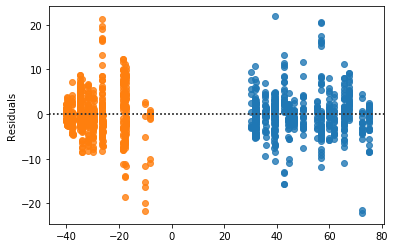

In [11]:
"""Visualising model results """
# we expect to see the result have zero mean distributed evenly around the x-axis 
sns.residplot(y_pred[:, 0], y_test[:, 0])
sns.residplot(y_pred[:, 1], y_test[:, 1]).set_ylabel('Residuals')

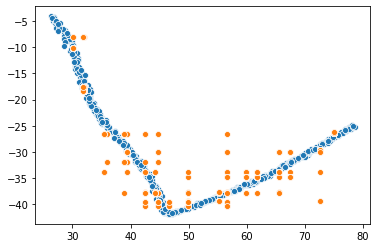

In [12]:
sns.scatterplot(y_test[:, 0], y_test[:, 1])
sns.scatterplot(y_pred[:, 0], y_pred[:, 1])

In [20]:
"""Feature Scaling """
sc_X = StandardScaler()
X_train = sc_X.fit_transform(x_train)
x_cup_test = sc_X.transform(test_cup)

""" Predicting the cup test set results and dump to csv"""

y_cup = et_regressor.predict(x_cup_test)
# pd.DataFrame(y_cup).to_csv("coffee_ML-CUP20-TS.csv",header=None)

In [2]:
import numpy as np
np.logspace(-3, 2, 6)

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])